## Assignment 2
# Group 13
Mathieu Mailhot - Isabel Lougheed - Frank-Lucas Pantazis

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os
import re

## Checkout link: https://www.analyticsvidhya.com/blog/2021/11/a-guide-to-building-an-end-to-end-multiclass-text-classification-model/

In [62]:
# Hyperparameter
folds = 5 # between 5 and 10

# Loading Training data
df_train = pd.read_csv('train.csv', encoding='utf-8', encoding_errors='ignore') # errors were not pertinent characters
df_train["subreddit"] = df_train["subreddit"].map({"Boston": 0, "Canberra": 1,"Geneva":2,"Ottawa":3})

y = df_train["subreddit"]
X = df_train.drop("subreddit",axis=1)

print(X)

# Loading Test Data
df_test = pd.read_csv('test.csv', encoding='utf-8', encoding_errors='ignore') # errors were not pertinent characters
X_test = df_test["body"] # Not what we should do with the ID

                                                   body
0     I had to put in a drain well/french drain, and...
1     I've worked with James from Prova accountants ...
2     https://lebonmelange.com.au/ is a Gungahlin ca...
3     What I love about Canberra are the town planni...
4     Canberra has a bigger issue with strata. Rates...
...                                                 ...
1395  Take the train to La pleine and walk to joncti...
1396  IIL alumni here!\r\n\r\nGeneva private schools...
1397  I'm really sorry to hear about your bad experi...
1398  They quite easy to handle. Typically, they don...
1399  **Specialization is authentic.** You don?t go ...

[1400 rows x 1 columns]


<h2>Text Preprocessing</h2>

In [3]:
# Test different stop word libraries

# Checkout: https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a/

<h3>Train</h3>

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Observations
# - bigram -> worse performance
# - sublinear_tf -> seems to improve accuracy
# - decreasing max_features -> seems to decrease accuracy (feature reduction)

# TODO
# - Create custom stop word list since default one might not be suited for our case according to documentation: https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words
# - explore different ways to extract features from text data
stop_words = {"like"}

# Instantiate Vectorizer
tfidf_uni = TfidfVectorizer(ngram_range=(1, 1), sublinear_tf=True, stop_words='english')
tfidf_uni_bi = TfidfVectorizer(ngram_range=(1, 2),sublinear_tf=True, stop_words='english')
tfidf_bi = TfidfVectorizer(ngram_range=(2, 2),  stop_words='english')
naiveBayes_uni = CountVectorizer(max_features=3000, ngram_range=(1, 1), stop_words='english')

# Fit Vectorizer from data
X_uni = tfidf_uni.fit_transform(df_train["body"]).toarray()
X_uni_bi = tfidf_uni_bi.fit_transform(df_train["body"]).toarray()
X_bi = tfidf_bi.fit_transform(df_train["body"]).toarray()
X_naive_bayes = naiveBayes_uni.fit_transform(df_train["body"]).toarray()

print("Unigram", "(size:",str(len(tfidf_uni.get_feature_names_out()))+")\n",tfidf_uni.get_feature_names_out(),"\n")
print("Unigram & Bigram", "(size:",str(len(tfidf_uni_bi.get_feature_names_out()))+")\n",tfidf_uni_bi.get_feature_names_out(),"\n")
print("Bigram", "(size:",str(len(tfidf_bi.get_feature_names_out()))+")\n", tfidf_bi.get_feature_names_out())

# To get a better idea of the extracted features
with open("features.csv", mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write a header (optional, if you want)
    writer.writerow(["Feature Name"])
    # Write the features from the array
    for feature in tfidf_uni.get_feature_names_out():
        writer.writerow([feature])

with open("featuresNaiveBayes.csv", mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write a header (optional, if you want)
    writer.writerow(["Feature Name"])
    # Write the features from the array
    for feature in naiveBayes_uni.get_feature_names_out():
        writer.writerow([feature])

Unigram (size: 12557)
 ['00' '000' '0001' ... 'zucchini' 'zurich' 'zxwr7mvro1z3kabb'] 

Unigram & Bigram (size: 62167)
 ['00' '00 33' '00 avec' ... 'zurich tried' 'zxwr7mvro1z3kabb'
 'zxwr7mvro1z3kabb year'] 

Bigram (size: 49610)
 ['00 33' '00 avec' '00 bit' ... 'zurich migrations' 'zurich tried'
 'zxwr7mvro1z3kabb year']


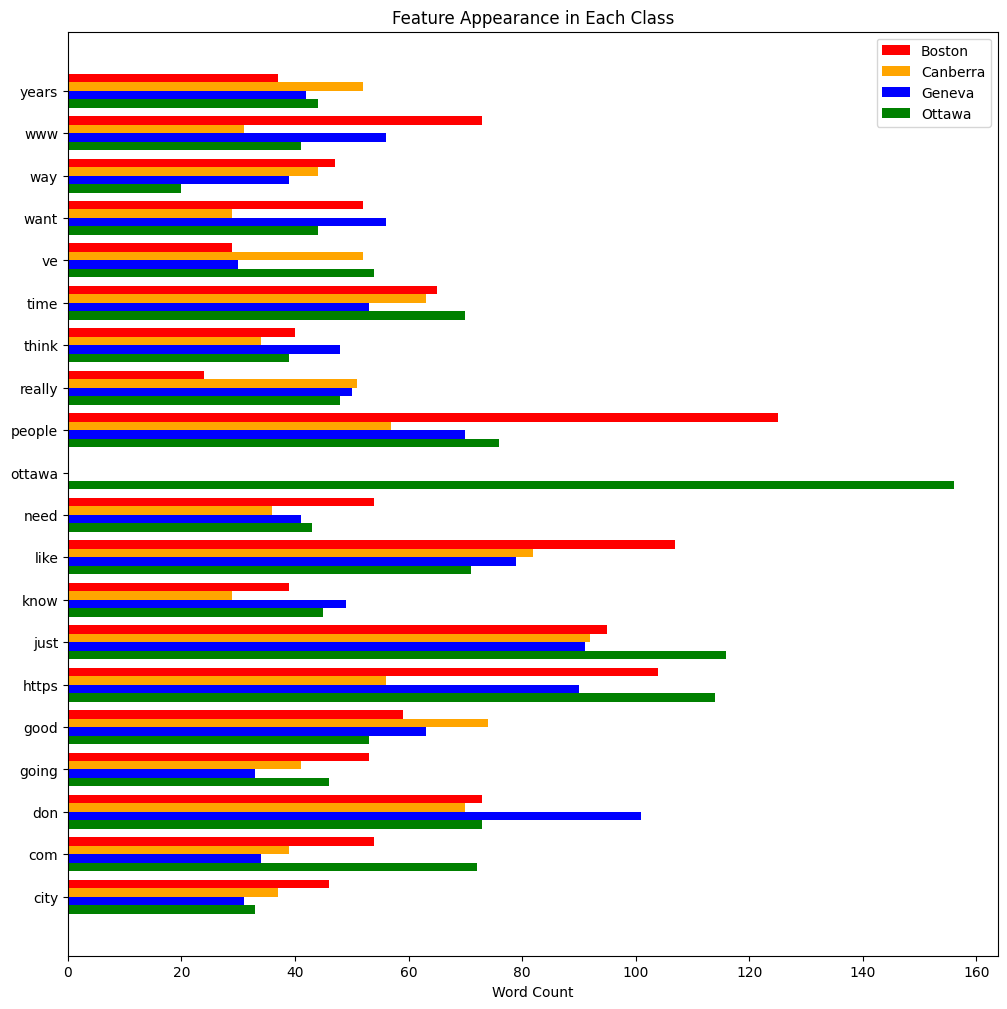

In [ ]:
# Draft of Feature Visualizer
# Maybe should put all of it in an excel and then display it?
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english',max_features=20)

X_disp = vectorizer.fit_transform(df_train["body"])
feature_names = vectorizer.get_feature_names_out()

Boston_counts = X_disp[y == 0].sum(axis=0).A1 # Sum occurrences for class 'Boston'
Canberra_counts = X_disp[y == 1].sum(axis=0).A1 # Sum occurrences for class 'Canberra'
Geneva_counts = X_disp[y == 2].sum(axis=0).A1 # Sum occurrences for class 'Geneva'
Ottawa_counts = X_disp[y == 3].sum(axis=0).A1 # Sum occurrences for class 'Ottawa'

# Plot a grouped bar chart
y_pos = np.arange(len(feature_names))*2 # Word indices
width = 0.4  # Bar width

fig, ax = plt.subplots(figsize=(12, 12))

ax.barh(y_pos + 3*width/2, Boston_counts, width, label="Boston", color='red')
ax.barh(y_pos + width/2, Canberra_counts, width, label="Canberra", color='orange')
ax.barh(y_pos - width/2, Geneva_counts, width, label="Geneva", color='blue')
ax.barh(y_pos - 3*width/2, Ottawa_counts, width, label="Ottawa", color='green')

# Formatting
ax.set_yticks(y_pos, labels=feature_names)

ax.set_xlabel("Word Count")
ax.set_title("Feature Appearance in Each Class")
ax.legend()

plt.show()


<h3>Helper Functions</h3>

In [54]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# This function does all the tunning for each model
def hyperparamaterTunning(X, param, folds, model):
    
    model_gridSearch = GridSearchCV(model, param_grid=param,cv=folds, verbose=True) # According to doc the data will be split the same way accross all calls

    model_best_clf = model_gridSearch.fit(X,y)

    cv_results = model_gridSearch.cv_results_

    print(f"Best Parameters: {model_best_clf.best_params_}")
    try:

        best_index = model_gridSearch.best_index_

        scores = model_gridSearch.cv_results_[f"split{best_index}_test_score"]

        print()
    except:
        pass
   

    print(f"Cross-validation Accuracies: {scores}")

    print(f"Mean Accuracy: {model_best_clf.best_score_:.4f}")

    return model_best_clf


<h2>Naive Bayes</h2>

In [ ]:
class NaiveBayes:
    def __init__(self, x_all, y_all, feature_vectoriser):
        self.x_all = self.clean_text_data(x_all) # Make lists of strings
        self.y_all = y_all
        self.feature_vectoriser = feature_vectoriser

        self.folds_features_probability = 0 # array of dict
        self.folds_accuracy = 0
        self.avg_accuracy = 0

    
    def calc_probability(self, x, y): # Train/Fit # Mathieu
        # Create an empty dictionnary with the 3000 most common words for each subreddit.
        features_probability_boston = {word: 0 for word in self.feature_vectoriser.get_feature_names_out()}
        features_probability_canberra = {word: 0 for word in self.feature_vectoriser.get_feature_names_out()}
        features_probability_geneva = {word: 0 for word in self.feature_vectoriser.get_feature_names_out()}
        features_probability_ottawa = {word: 0 for word in self.feature_vectoriser.get_feature_names_out()}

        # Initialize the count for the total number of text from each subreddit
        count_boston = 0
        count_canberra = 0
        count_geneva = 0
        count_ottowa = 0

        # Add 1 to the word in the dictionnary when the word is present in the text
        for i in range(y.shape[0]):
            if y[i] == 0:
                count_boston += 1
                self.add_probability(features_probability_boston, x[i])
            if y[i] == 1:
                count_canberra += 1
                self.add_probability(features_probability_canberra, x[i])
            if y[i] == 2:
                count_geneva += 1
                self.add_probability(features_probability_geneva, x[i])
            else:
                count_ottowa += 1
                self.add_probability(features_probability_ottawa, x[i])

        # Add the total count of each city to a variable called "city_count" and the probability of each city in a variable called "city_probability" in each one of the dictionary
        features_probability_boston["city_count"] = count_boston
        features_probability_boston["city_probability"] = count_boston / (count_boston + count_canberra + count_geneva + count_ottowa)
        features_probability_canberra["city_count"] = count_canberra
        features_probability_canberra["city_probability"] = count_canberra / (count_boston + count_canberra + count_geneva + count_ottowa)
        features_probability_geneva["city_count"] = count_geneva
        features_probability_geneva["city_probability"] = count_geneva / (count_boston + count_canberra + count_geneva + count_ottowa)
        features_probability_ottawa["city_count"] = count_ottowa
        features_probability_ottawa["city_probability"] = count_ottowa / (count_boston + count_canberra + count_geneva + count_ottowa)
                
        return features_probability_boston, features_probability_canberra, features_probability_geneva, features_probability_ottawa # return all dictionaries

    def clean_text_data(self, x): # Helper function to make a list of lists of words 
        # Take text remove all capitalized letters, removed special characters and make an array of words.
        cleaned_data = [
            re.sub(r'[^a-z0-9\s]', '', text.lower()).split()
            for text in x
        ]
        print("This is the cleaned data", cleaned_data[0])
        return cleaned_data # return a list of lists of words (better to use lists for this since numpy is mostly for numerical values)
    
    def add_probability(self, city_dict, x): # Helper function to update probabilities given a dict and a list of words
        for word in set(x): # Creates a set from words(unique elements)
            if word in city_dict:
                city_dict[word] += 1
                
    
    def predict(self, features_probability_boston, features_probability_canberra, features_probability_geneva, features_probability_ottawa, x_i): # (Is x_i in formula equal to 1?)
        # Initialize probabilities for each subreddit
        prob_boston = features_probability_boston["city_probability"]
        prob_canberra = features_probability_canberra["city_probability"]
        prob_geneva = features_probability_geneva["city_probability"]
        prob_ottowa = features_probability_ottawa["city_probability"]

        for word in x_i:
            if word in features_probability_boston: # All have the same most common words
                # Laplace smoothing
                prob_boston = prob_boston * ((features_probability_boston[word] + 1) / (features_probability_boston["city_count"] + 2))
                prob_canberra = prob_canberra * ((features_probability_canberra[word] + 1) / (features_probability_canberra["city_count"] + 2))
                prob_geneva = prob_geneva * ((features_probability_geneva[word] + 1) / (features_probability_geneva["city_count"] + 2))
                prob_ottowa = prob_ottowa * ((features_probability_ottawa[word] + 1) / (features_probability_ottawa["city_count"] + 2))
        
        probabilities = np.array([prob_boston, prob_canberra, prob_geneva, prob_ottowa])
        
        return np.argmax(probabilities)

    def accu_eval(self, x, y): # Issy
        pass

    def crossValidation(self, k): # Issy (PS: I think we are allowed to use the method from sklearn)
        pass


In [61]:
# Naive Bayes set up
naiveBayes = NaiveBayes(X.to_numpy().flatten(), y.to_numpy(), feature_vectoriser=naiveBayes_uni)

##### THIS IS JUST FOR TESTING #####
features_probability_boston, features_probability_canberra, features_probability_geneva, features_probability_ottawa = naiveBayes.calc_probability(naiveBayes.x_all, naiveBayes.y_all)
print(features_probability_boston)
##### THIS IS JUST FOR TESTING #####

This is the cleaned data ['i', 'had', 'to', 'put', 'in', 'a', 'drain', 'wellfrench', 'drain', 'and', 'the', 'ground', 'about', '6', 'inches', 'down', 'was', 'all', 'mud', 'and', 'clay', 'i', 'was', 'ass', 'over', 'end', 'in', 'this', 'hole', 'scooping', 'clay', 'mud', 'and', 'was', 'joined', 'by', 'probably', 'ten', 'of', 'these', 'mud', 'daubers', 'for', 'a', 'couple', 'hours', 'they', 'never', 'bothered', 'me', 'at', 'all', 'in', 'their', 'own', 'little', 'way', 'they', 'were', 'kinda', 'helping', 'out', 'i', 'suppose', 'theyd', 'build', 'nests', 'in', 'the', 'garage', 'where', 'i', 'workout', 'and', 'aside', 'from', 'almost', 'smacking', 'into', 'each', 'other', 'they', 'never', 'bothered', 'me', 'theyd', 'just', 'go', 'back', 'and', 'forth', 'building', 'their', 'mud', 'tubes', 'and', 'filling', 'them', 'with', 'paralyzed', 'spiders', 'i', 'think', 'they', 'helped', 'with', 'garden', 'pests', 'and', 'we', 'had', 'so', 'many', 'spiders', 'i', 'didnt', 'mind', 'them', 'culling', 'tha

In [7]:
# Compare with Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

param_grid_NB_1 = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}

NB = hyperparamaterTunning(X_uni, param,folds, MultinomialNB())

NameError: name 'param' is not defined

<h2>Logistic Regression Models</h2>

In [8]:
from sklearn.linear_model import LogisticRegression

param_grid_logModel_1 = [
    {"penalty":["elasticnet"],
     "l1_ratio": np.arange(0, 1.2, 0.2), # 0 is only l2 penalty, 1 is only l1 penalty
     "solver":["saga"],
     "max_iter": [1000]
     }]

logModel_tunned_1 = hyperparamaterTunning(X_uni, param_grid_logModel_1, folds, LogisticRegression(fit_intercept=True))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'l1_ratio': 0.0, 'max_iter': 1000, 'penalty': 'elasticnet', 'solver': 'saga'}

Cross-validation Accuracies: [0.70714286 0.65       0.66428571 0.62142857 0.575      0.53571429]
Mean Accuracy: 0.7050


In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid_logModel_2 = [
    {"penalty":["l2"],
     "solver":["sag","lbfgs","newton-cg"],
     "tol":[1e-4,1e-5],
     "max_iter": [1000,2000]
     }]
logModel_tunned_2 = hyperparamaterTunning(X_uni, param_grid_logModel_2, folds, LogisticRegression(fit_intercept=True))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters: {'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}
Cross-validation Accuracies: [0.70714286 0.70714286 0.70714286 0.70714286 0.70714286 0.70714286
 0.70714286 0.70714286 0.70714286 0.70714286 0.70714286 0.70714286]
Mean Accuracy: 0.7050


<h2>Linear SVC Models</h2>

In [ ]:
from sklearn.svm import LinearSVC
param_grid_SVC_1 = [
    {"penalty":["l1","l2"],
     "loss": ["squared_hinge"],
     "tol":[1e-4,1e-5],
     "max_iter": [1000]
     }]

SVMModel_tunned_1 = hyperparamaterTunning(X_uni, param_grid_SVC_1, folds, LinearSVC(fit_intercept=True))

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best Parameters: {'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.0001}
Cross-validation Accuracies: [0.69285714 0.69285714 0.69285714 0.69285714]
Mean Accuracy: 0.7093


In [ ]:
from sklearn.svm import LinearSVC
param_grid_SVC_2 = [
    {"penalty":["l2"],
     "loss": ["hinge","squared_hinge"],
     "tol":[1e-4,1e-5],
     "max_iter": [1000]
     }]

SVMModel_tunned_2 = hyperparamaterTunning(X_uni_bi, param_grid_SVC_2, folds, LinearSVC(fit_intercept=True))

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best Parameters: {'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.0001}
Cross-validation Accuracies: [0.70714286 0.70714286 0.71428571 0.71428571]
Mean Accuracy: 0.7143


<h2>Random Forest Model</h2>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = [{
"criterion":["gini", "entropy", "log_loss"],
"max_features":["sqrt", "log2"],
"max_depth": range(10,20) # Need to look into what values to use here
}]
rF = hyperparamaterTunning(X_uni, param_grid_rf, folds, RandomForestClassifier())